In [104]:
import torch
import torchvision.transforms as transforms

from PIL import Image

import os

import pandas as pd

In [5]:
image_label_csv = pd.read_csv('image_label.csv')

image_label_csv

,id,path,file_name,absolute_path,label
0,000001,000001_female_Asian_45,incorrect_mask.jpg,/opt/ml/input/data/train/images/000001_female_...,10
1,000001,000001_female_Asian_45,mask4.jpg,/opt/ml/input/data/train/images/000001_female_...,4
2,000001,000001_female_Asian_45,mask2.jpg,/opt/ml/input/data/train/images/000001_female_...,4
3,000001,000001_female_Asian_45,mask1.jpg,/opt/ml/input/data/train/images/000001_female_...,4
4,000001,000001_female_Asian_45,mask3.jpg,/opt/ml/input/data/train/images/000001_female_...,4
...,...,...,...,...,...
18895,006959,006959_male_Asian_19,mask2.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18896,006959,006959_male_Asian_19,mask1.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18897,006959,006959_male_Asian_19,mask3.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18898,006959,006959_male_Asian_19,normal.jpg,/opt/ml/input/data/train/images/006959_male_As...,12


### 불균형한 label 찾기

In [6]:
def countLabel(df, label):
    return len(df.loc[df['label'] == label])

In [9]:
num_of_label = [countLabel(image_label_csv,l) for l in range(18)]

label_need_aug_4 = [ l for l in range(18) if 400 < num_of_label[l] <900]
label_need_aug_10 = [l for l in range(18) if num_of_label[l] < 200]

In [14]:
num_of_label

[2740,
 2045,
 415,
 3665,
 4090,
 545,
 548,
 409,
 83,
 733,
 818,
 109,
 548,
 409,
 83,
 733,
 818,
 109]

In [11]:
label_need_aug_4

[2, 5, 6, 7, 9, 10, 12, 13, 15, 16]

In [12]:
label_need_aug_10

[8, 11, 14, 17]

In [13]:
len(label_need_aug_4 + label_need_aug_10)

14

### image transform test

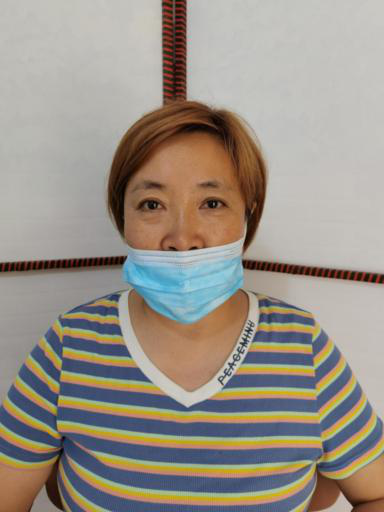

In [18]:
im = Image.open(image_label_csv['absolute_path'][0])

im

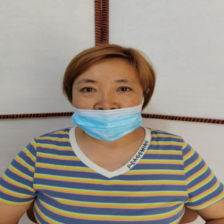

In [19]:
im = transforms.Resize((224,224))(im)

im

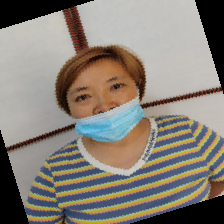

In [37]:
transforms.RandomRotation((10,30))(im)

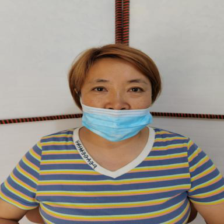

In [42]:
transforms.RandomHorizontalFlip(1)(im)

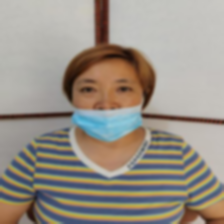

In [100]:
transforms.GaussianBlur(kernel_size=(5,5), sigma=(0.1,5))(im)

### Image Augmentation

In [101]:
image_path = '/opt/ml/input/data/train/images'

In [118]:
def appendRow(df,id,path,file_name,absolute_path,label):
    df = df.append({
        "id":id,
        "path": path,
        "file_name": file_name,
        "absolute_path": absolute_path,
        "label": label
    },ignore_index=True)

In [127]:
for l in label_need_aug_4:
    df = image_label_csv.loc[image_label_csv.label == l].reset_index()
    for i in range(len(df)):
        direc_path = os.path.join(image_path,df['path'][i])
        image_name = df['file_name'][i]
        im = Image.open(os.path.join(direc_path,image_name))

        im = transforms.Resize((224,224))(im)
        im1 = transforms.RandomHorizontalFlip(1)(im)
        im2 = transforms.RandomRotation((10,30))(im)
        im3 = transforms.GaussianBlur(kernel_size=(5,5),sigma=(1,5))(im)
        im4 = transforms.GaussianBlur(kernel_size=(5,5),sigma=(1,5))(im1)

        im1.save(os.path.join(direc_path,"hflip.jpg"),"JPEG")
        im2.save(os.path.join(direc_path,"rotation.jpg"),"JPEG")
        im3.save(os.path.join(direc_path,"blur.jpg"),"JPEG")
        im4.save(os.path.join(direc_path,"hflip_blur.jpg"),"JPEG")

        appendRow(image_label_csv,df['id'][i],df['path'][i],"hflip.jpg",os.path.join(direc_path,"hflip.jpg"),df['label'][i])
        appendRow(image_label_csv,df['id'][i],df['path'][i],"rotation.jpg",os.path.join(direc_path,"rotation.jpg"),df['label'][i])
        appendRow(image_label_csv,df['id'][i],df['path'][i],"blur.jpg",os.path.join(direc_path,"blur.jpg"),df['label'][i])
        appendRow(image_label_csv,df['id'][i],df['path'][i],"hflip_blur.jpg",os.path.join(direc_path,"hflip_blur.jpg"),df['label'][i])

In [133]:
for l in label_need_aug_4:
    df = image_label_csv.loc[image_label_csv.label == l].reset_index()
    for i in range(len(df)):
        direc_path = os.path.join(image_path,df['path'][i])
        image_name = df['file_name'][i]
        im = Image.open(os.path.join(direc_path,image_name))

        im = transforms.Resize((224,224))(im)
        im1 = transforms.RandomHorizontalFlip(1)(im)
        im2 = transforms.RandomRotation((10,30))(im)
        im3 = transforms.GaussianBlur(kernel_size=(5,5),sigma=(1,5))(im)
        im4 = transforms.GaussianBlur(kernel_size=(5,5),sigma=(1,5))(im1)

        im1.save(os.path.join(direc_path,f"{image_name[:-3]}-hflip.jpg"),"JPEG")
        im2.save(os.path.join(direc_path,f"{image_name[:-3]}-rotation.jpg"),"JPEG")
        im3.save(os.path.join(direc_path,f"{image_name[:-3]}-blur.jpg"),"JPEG")
        im4.save(os.path.join(direc_path,f"{image_name[:-3]}-hflip_blur.jpg"),"JPEG")


        # appendRow(image_label_csv,df['id'][i],df['path'][i],"hflip.jpg",os.path.join(direc_path,"hflip.jpg"),df['label'][i])
        # appendRow(image_label_csv,df['id'][i],df['path'][i],"rotation.jpg",os.path.join(direc_path,"rotation.jpg"),df['label'][i])
        # appendRow(image_label_csv,df['id'][i],df['path'][i],"blur.jpg",os.path.join(direc_path,"blur.jpg"),df['label'][i])
        # appendRow(image_label_csv,df['id'][i],df['path'][i],"hflip_blur.jpg",os.path.join(direc_path,"hflip_blur.jpg"),df['label'][i])

In [132]:
# 삭제 코드
# for l in label_need_aug_4:
#     df = image_label_csv.loc[image_label_csv.label == l].reset_index()
#     for i in range(len(df)):
#         direc_path = os.path.join(image_path,df['path'][i])
#         for name in ['hflip.jpg','rotation.jpg','blur.jpg','hflip_blur.jpg']:
#             if os.path.isfile(os.path.join(direc_path, name)):
#                 os.remove(os.path.join(direc_path,name))


In [128]:
# image_label_csv.tail()

,id,path,file_name,absolute_path,label
18895,006959,006959_male_Asian_19,mask2.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18896,006959,006959_male_Asian_19,mask1.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18897,006959,006959_male_Asian_19,mask3.jpg,/opt/ml/input/data/train/images/006959_male_As...,0
18898,006959,006959_male_Asian_19,normal.jpg,/opt/ml/input/data/train/images/006959_male_As...,12
18899,006959,006959_male_Asian_19,mask5.jpg,/opt/ml/input/data/train/images/006959_male_As...,0


### image_label.csv 갱신

In [135]:
train_csv = pd.read_csv('train3.csv')

In [137]:
train_csv.head()

,id,gender,race,age,path
0,000001,female,Asian,45,000001_female_Asian_45
1,000002,female,Asian,52,000002_female_Asian_52
2,000004,male,Asian,54,000004_male_Asian_54
3,000005,female,Asian,58,000005_female_Asian_58
4,000006,female,Asian,59,000006_female_Asian_59


In [138]:
def makeLabeling(pd,idx,name):
    if name == 'm':
        if pd['gender'][idx] == 'male':
            if pd['age'][idx] < 30: return 0
            elif 30 <= pd['age'][idx] < 60: return 1
            else: return 2
        else:
            if pd['age'][idx] < 30: return 3
            elif 30 <= pd['age'][idx] < 60: return 4
            else: return 5
    elif name == 'i':
        if pd['gender'][idx] == 'male':
            if pd['age'][idx] < 30: return 6
            elif 30 <= pd['age'][idx] < 60: return 7
            else: return 8
        else:
            if pd['age'][idx] < 30: return 9
            elif 30 <= pd['age'][idx] < 60: return 10
            else: return 11
    else:
        if pd['gender'][idx] == 'male':
            if pd['age'][idx] < 30: return 12
            elif 30 <= pd['age'][idx] < 60: return 13
            else: return 14
        else:
            if pd['age'][idx] < 30: return 15
            elif 30 <= pd['age'][idx] < 60: return 16
            else: return 17

In [139]:
file_dict = {k:[] for k in ['id','path','file_name','absolute_path','label']}

In [140]:
IMAGE_PATH = '/opt/ml/input/data/train/images'

for i in range(len(train_csv)):
    total_path = os.path.join(IMAGE_PATH,str(train_csv['path'][i]))
    for file_name in os.listdir(total_path):
        # 확장자 제거, 이름만 가져오기
        fn_split = file_name.split(".")
        if len(fn_split[0]) == 0: 
            continue
        name = fn_split[0][0]
        # labeling
        label = makeLabeling(train_csv,i,name)
        file_dict['id'].append(train_csv['id'][i])
        file_dict['file_name'].append(file_name)
        file_dict['path'].append(train_csv['path'][i])
        file_dict['absolute_path'].append(os.path.join(total_path,file_name))
        file_dict['label'].append(label)

In [141]:
for k in ['id','path','file_name','absolute_path','label']:
    print(len(file_dict[k]))

44340
44340
44340
44340
44340


In [143]:
augmentation_label = pd.DataFrame(file_dict)

In [148]:
augmentation_label.to_csv('augmentation_label.csv',index=False)

In [145]:
a = augmentation_label.iloc[-1]['absolute_path']